In [170]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import import_ipynb
import preprocessing

In [171]:
X_train = pd.read_csv("X_train_scaled.csv")
X_test  = pd.read_csv("X_test_scaled.csv")
y_train = pd.read_csv("y_train.csv")["Loan Status"]
y_test  = pd.read_csv("y_test.csv")["Loan Status"]

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (71828, 27) X_test: (17958, 27)
y_train: (71828,) y_test: (17958,)


In [172]:
# TO DO: Initialize the random forest classification model
model = RandomForestClassifier(
    n_estimators = 200, 
    max_depth = 30, 
    min_samples_split = 3, 
    min_samples_leaf = 2,  
    max_features = 'sqrt',
    n_jobs = -1, 
    random_state = 42, class_weight = 'balanced'
)
# TO DO: fit the model
model.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,30
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [173]:
#TO DO: use predict_proba to get probabilities and make predictions
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

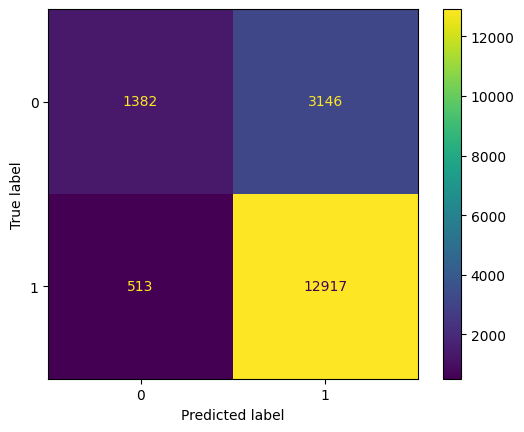

In [174]:
#TO DO: Visualize confusion matrix using ConfusionMatrixDisplay
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels=model.classes_)
disp.plot()
plt.show()

In [175]:
#TO DO: Calculate accuracy using sklearn metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)

0.7962467980844192


In [176]:
#TO DO: Calculate precision using sklearn metrics
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.8041461744381497


In [177]:
#TO DO: Calculate recall using sklearn metrics
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.9618019359642591


In [178]:
#TO DO: Calculate F1 score using sklearn metrics
f1_score = metrics.f1_score(y_test, y_pred)
print(f1_score)

0.8759366629369681


In [179]:
#TO DO: Calculate specificity using confusion matrix
num = confusionMatrix[0][0]
denom = confusionMatrix[0][0] = confusionMatrix[0][1]
print(num/denom)

0.4392879847425302


In [180]:
#TO DO: Calculate ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

[0.         0.69478799 1.        ] [0.         0.96180194 1.        ] [inf  1.  0.]


AUROC: 0.6335069750492673


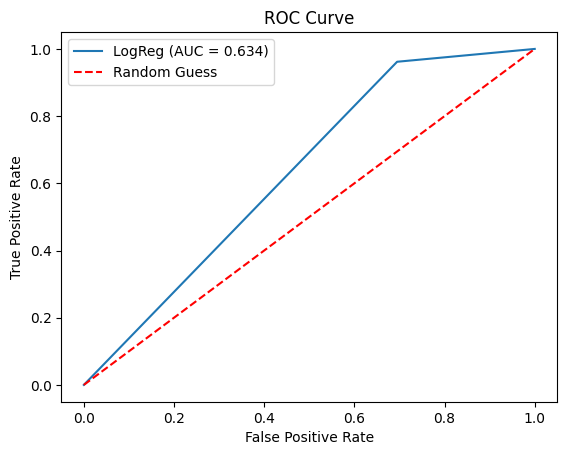

In [181]:
from sklearn.metrics import roc_auc_score, roc_curve

# TO DO: Calculate AUROC
area = metrics.roc_auc_score(y_test, y_pred)
print("AUROC:", area)
# TO DO: Plot ROC curve
plt.plot(fpr, tpr,label = f"LogReg (AUC = {area:.3f})")
plt.plot([0,1],[0,1], 'r--', label = "Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()